In [ ]:
# -- besure to put the title, name, email and date here in a markdown cell! 

In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules 
from sklearn.model_selection import train_test_split   #- partition train/test split 
from sklearn.tree import DecisionTreeClassifier        #- create a decison tree 
from sklearn.ensemble import ExtraTreesClassifier      #- random trees 
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier 

# -- we need this to make our pipeline 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# -- categorical encoders -- 
from category_encoders import *


# -- need this to render charts in notebook -- 
%matplotlib inline


## Project 3,  Who is Likely to Respond?

You were so successful with your your last two projects, you've found a way to jump ship, make some more loot and land a job as a data scientist at a major financial institution. Your new bosses want you to analyze telemarketing promotion responses. Can you identify who is likely to respond to a promotion? Promotions are expensive so you can't blast everyone. The bank took a random sample of customers and run a randomized experiment to see who is likely to respond to new promotions. Your task is to use that data to predict which customers are most likely to respond to the promotion. 

The following Tasks have been dived into Three(3) parts, simply look at the section's **Todos** for your project's required tasks. If there is a question, simply add a markdown cell and answer the question. As always feel free to add additional cells and analysis as you dig into the data.  


### Part 1
0. pip install **category_encoders**
    - https://github.com/scikit-learn-contrib/category_encoders
    - read about them here! http://contrib.scikit-learn.org/category_encoders/
    
1. Stage data
2. Clean up column names 
3. Describe data 
4. Transform & create new columns 
5. Explore likely predictors  

### Part 2.

6. Partition into 75/25 split 

7. Train 2 ExtraTrees Classifiers
    - onehot encoding 
    - target encoding  
    - feature importance 

8. Train 2 RandomForest Classifiers 
    - onehot encoding
    - target encoding 
    - feature importance 
    
9. Evaluate & Compare Performance of Each 
    - confusion matrix 
    - calculate accuracy 
    - Receiver Operator Characteristic (ROC Chart) 
    - Area Under the Curve (AUC)
    - Recal(TPR) @4% FPR  


### Part 3.  

10. Write up your thoughts.
    - which model perfomed the best? by what measure did you use? 
    - Did the models have similar feature importance? did different categorical encodings make a difference? and which do you think is more likely to lead to overfitting and why? 
    - should you evaluate your model on training or test performance metrics? why? 
    - which model peformed best and why do you think?
    - for your best performing ExtraTree and RandomForest models at a false positive rate of 4% what is the true positive rate? and score thresholds. What would be the business rule you would tell the business to implement? 

    - If you apply gthe business rule at 4% FPR, how many True Positives would your model find on the Test Set vs False Positives, if you made \\$10 for each true positive and -\\$2 for each false positive how much would your campaign make? 
  

# Part 1. 
## 1. Stage 
----- 
Import our dataset into a pandas dataframe, this is a famous dataset. The target varaible is "y", and is a binary "yes" / "no" did didn't respond to telemarketing offer. 

> Note this dataset uses a semicolon delimiter, i've provided a snipit below. 


https://archive.ics.uci.edu/ml/datasets/bank+marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

<div class="alert alert-info"> 💡 <strong> TODO </strong>
 
1. Read bank-additional-full.csv into a dataframe named df 
2. use df.head() to display the first 5 records 
3. take note of variables like education. 
</div>

```python 
df = pd.read_csv("../Week_3/Data/bank-additional-full.csv", header=0, sep=';', quotechar='"')
df.head()
```

In [2]:
df = pd.read_csv("../Week_3/Data/bank-additional-full.csv", header=0, sep=';', quotechar='"')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
ed_level           object
ed_years            int64
dtype: object

## 2.  Clean up Column Names

*It's just not fun dealing with ill-formed columns*

<div class="alert alert-info"> 💡 <strong> TODO </strong>
 
- remove leading and trailing characters
- replace spaces with underscores _ 
- replace "." with underscores _ 
- change case to lower case
- remove various special characters
- rename column named y to target 

</div>



## 3. Describe data


<div class="alert alert-info"> 💡 <strong> TODO </strong>
 
- check target, counts and PCTs 
- generate descriptive statisicts with describe 
- check for nulls 

</div>


## 4. Transform Variables 

**tranform education**  

- university.degree,      12168
- high.school,             9515
- basic.9y,                6045
- professional.course,     5243
- basic.4y,                4176
- basic.6y,                2292
- unknown,                 1731
- illiterate,                18

<div class="alert alert-info"> 💡 <strong> TODO </strong>
 
- parse education into the followng columns 
    - "ed_level", a string, it should contain university, high, basic, professional, unknown, illiterate 
    - "ed_years", an integer by mapping "professional" 18, "university" to 16, "high.school" to 12, and basic 9,4, and 6 respectively, unknown -1, illerterate to 3 
        

</div>

In [14]:
# new data frame with split value columns 
df['ed_level'] = df["education"].str.split(".", n = 1, expand = True)[0] 
df['ed_years'] = df['education'].map({"university.degree":16,
                                      "high.school":12,
                                     "basic.9y": 9,
                                     "professional.course":18,
                                     "basic.4y" : 4,
                                     "basic.6y":6,
                                     "unknown" : -1,
                                     "illiterate":3})
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,ed_level,ed_years
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic,4
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high,12
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high,12
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,basic,6
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,high,12


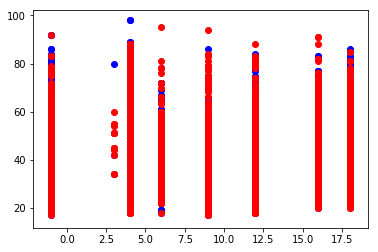

In [28]:
df_yes = df[df['y'] == "yes"]
df_no = df[df['y'] == "no"]

plt.scatter(df_yes['ed_years'], df_yes['age'], c="blue")
plt.scatter(df_no['ed_years'], df_no['age'],  c="red")
plt.show()

## 5. Explore likely predictors 

<div class="alert alert-info"> 💡 <strong> TODO </strong>
 
- Pick 4 character columns 
    - crosstab 
    - frequency count by target  
    - percentage by target 
- Pick 4 numeric columns 
    - cut them into bins 
    - frequency count by target 
    - percentage by target 
    
- pick a pair of numberic columns 
    - create a scatterplot, color by target 

- pick a 2nd pair of numberic columns 
    - create a 2nd scatterplot, color by target 

- use seaborn's pairs plot like we've seen a couple times already. 

**Answer**
1. does anything stand out to you about these plots? 
2. do you think any of these will be good predictors of our target? 
3. can you think of anther graphic which might be useful to identify responders vs. non-responders. 

</div>

# Part 2.
## 6. Partition into 75/25 split 

<div class="alert alert-info"> 💡 <strong> TODO </strong>
    
- partition into 75/25 split.. 
- print out the percentages 

</div>


## 7 & 8. Train 2 ExtraTreesClassifier's  & 2 RandomForestClassifiers


-----



<div class="alert alert-info"> 💡 <strong> TODO </strong>
    
- Deterimine which columns go into 
    - target
    - numeric features
    - categorical features 
    
- Create ExtraTree pipeline #1 
    - categorical handling 
        - missing value handling, strategy='constant', fill_value='missing'
        - onehot encode, handle_unknown='ignore', use_cat_names=True
        - **NOTE: you are now using "category_encoders'" version of one hot encoding which is different, than sklearn's***
        
    - numeric handling 
        - missing value handling, strategy='mean'
        
    - ExtraTreesClassifier, use the following hyper parameters 
        - n_estimators=100 
        - max_depth = 20
        - min_samples_leaf = 2 
        - n_jobs=-1

- Create ExtraTree pipeline #2 
    - categorical handling 
        - missing value handling, strategy='constant', fill_value='missing'
        - TargetEncoder()
        - **NOTE:target encoder is comming from "category_encoders'" ***
    - numeric handling 
        - missing value handling, strategy='mean'
        
    - ExtraTreesClassifier, use the following hyper parameters 
        - n_estimators=100 
        - max_depth = 20
        - min_samples_leaf = 2 
        - n_jobs=-1
        
- Create RandomForest pipeline #1 
    - categorical handling 
        - missing value handling, strategy='constant', fill_value='missing'
        - onehot encode, handle_unknown='ignore', use_cat_names=True
        - **NOTE: you are now using "category_encoders'" version of one hot encoding which is different, than sklearn's***
        
    - numeric handling 
        - missing value handling, strategy='mean'
        
    - RandomForestClassifier, use the following hyper parameters 
        - n_estimators=100 
        - max_depth = 20
        - min_samples_leaf = 2 
        - n_jobs=-1

- Create a RandomForest's pipeline #2 
    - categorical handling 
        - missing value handling, strategy='constant', fill_value='missing'
        - TargetEncoder(smoothing=4)
        - **NOTE:target encoder is comming from "category_encoders'" ***
    - numeric handling 
        - missing value handling, strategy='mean'
        
    - RandomForestClassifier, use the following hyper parameters 
        - n_estimators=100 
        - max_depth = 20
        - min_samples_leaf = 2 
        - n_jobs=-1


</div>


## 9. Evaluate 

<div class="alert alert-info"> 💡 <strong> TODO </strong>
    
FOR EACH classifier calculate the following 
1. calculate the varaible importance
2. confusion matrix of test counts 
3. confusion matrix of test percentages 
4. accuracy of both train and test vs baseline (i.e. the do nothing case) 
5. create a ROC chart with AUC calcualtion comparing training and testing 
6. make a table of FPR, TPR and Threshold from 0 - 10% FPR 


> hint make your life easier and make a function! 
</div>





### Extract Transformed Feature Names, 

this just makes life easier... we need to get the new feature names from the transformed data specifically from the categorical transformer. Since we use onehot encoding we turn all categories into new columns with 0/1s. NOTE this is slightly different than sklearn's onehot encoding way to extract transformed column names. 

In [ ]:
# -- gets the feature names -- this is slightly diffeernt with category encoders than sklearn's 
categorical_pipe.fit_transform(train[categorical_features])
transformed_categorical = categorical_pipe['onehot'].get_feature_names()

# -- creates one list of all the feature names. 
feature_names =  transformed_categorical + numeric_features

In [ ]:

# -- get feature importance 
importance = <your pipeline here>['classifier'].feature_importances_

# -- summarize feature importance into a dictionary 
feature_imp ={}
for i,v in enumerate(importance):
    items = feature_names[i].split('_')
    if items[0].isdigit():
        fname = categorical_features[int(items[0])] + "_" + items[1]
        feature_imp[fname] = v
    else:
        feature_imp[feature_names[i]] = v
       

    # make the dictionary a data frame 
feature_imp = pd.DataFrame.from_dict(feature_imp, orient='index',
                                     columns=['importance'])

# -- prep and filter our dataframe, only need to look at the important features i.e. things > 0 
feature_imp = (feature_imp
               .reset_index()
               .rename(columns={'index':'feature'})
               .sort_values('importance',ascending=False)
               .query('importance > 0.01'))

# -- plot that 
plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="feature", data=feature_imp, color="lightblue")
plt.title('Variable Iportance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.xticks(rotation=45)
plt.show()




##  Evaluate Performance 
-----

Here we want to compare the accuracy and confusion matrix of our decision tree pipeline on both our training data and test data. Sklearn provides two convient function to apply our models 

    .predict() - predicts the "label" or "target" on a new data set. This method accepts one argument, the new data set (e.g. model. predict(X_new) ), and returns the learned label for row. this is nescessary to calcualte Accuracy 
    
    .predict_proba() -  gives us the probabilities for the target (0 and 1) in array form. The number of probabilities for each row is equal to the number of categories in target variable. this is needed to calculate AUC 
    
-----
1. Apply to training data 
2. Apply to testing data


## 10. Write up.

<div class="alert alert-info"> 💡 <strong> TODO </strong>

- which model perfomed the best? by what measure did you use? 
- Did the models have similar feature importance? did different categorical encodings make a difference? and which do you think is more likely to lead to overfitting and why? 
- should you evaluate your model on training or test performance metrics? why? 
- which model peformed best and why do you think?
- for your best performing ExtraTree and RandomForest models at a false positive rate of 4% what is the true positive rate? and score thresholds. What would be the business rule you would tell the business to implement? 

- If you apply gthe business rule at 4% FPR, how many True Positives would your model find on the Test Set vs False Positives, if you made \\$10 for each true positive and -\\$2 for each false positive how much would your campaign make? 
  


</div>


